## Classification of Exchange Traded Funds(ETFs) on the Basis of Profitability

#### ETFs are a collection of investments, such as equities or bonds, that trade on exchanges and generally track a specific index. They can be bought or sold like a common stock on a stock exchange, and can be bought or sold intraday at different prices.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans


In [2]:
! pip install scikit-learn


In [3]:
df = pd.read_csv('ETFs.csv')
df

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,ETF,US,Cboe Vest S&P 500 Buffer Strate,CBOE Vest S&P 500 Buffer Strategy Fund Class C...,USD,Pacific/Asia ex-Japan Stk,CBOE Vest,PCX,NYSEArca,...,16.88,0.48,6.57,-0.50,1.11,0.55,83.67,18.28,0.32,3.94
2306,ERUS,ETF,US,Buffalo Flexible Income Fund,Buffalo Flexible Income Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,23.34,0.70,12.44,-3.60,1.40,0.44,59.31,27.56,0.17,0.58
2307,EWA,ETF,US,Buffalo Dividend Focus Fund,Buffalo Dividend Focus Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,19.27,0.48,6.51,-0.58,1.17,0.57,75.70,20.30,0.31,3.60
2308,EWC,ETF,US,"Buffalo Large Cap Fund, Inc.",Buffalo Large Cap Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,18.14,0.61,9.05,-1.14,1.00,0.44,76.01,17.31,0.27,3.25


In [4]:
# Select relevant categorical columns for encoding
categorical_columns = ['quote_type', 'region', 'fund_category', 'fund_family', 'exchange_code', 'currency']  # Adjust these if needed

# Encode categorical variables
x = pd.get_dummies(df[categorical_columns])

# Select numeric columns and drop specified columns
drop_columns = ['category_return_2016', 'category_return_2017', 'category_return_2018', 'category_return_2019', 'category_return_2020']
df_numeric = df.select_dtypes(include='number')
df_numeric = df_numeric.drop(columns=[col for col in drop_columns if col in df_numeric.columns], errors='ignore')


In [5]:
# Concatenate numeric data with encoded categorical data
df_combined = pd.concat([df_numeric.reset_index(drop=True), x.reset_index(drop=True)], axis=1)



In [6]:
# Impute missing values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
a = imp.fit_transform(df_combined)

# Scale data
scaler = MinMaxScaler()
b = scaler.fit_transform(a)

df_scaled = pd.DataFrame(b, columns=df_combined.columns)


In [7]:
# Covariance
c = df_scaled.cov()


In [8]:
df = pd.concat([df, x], ignore_index=True,axis=1)

### Heatmap

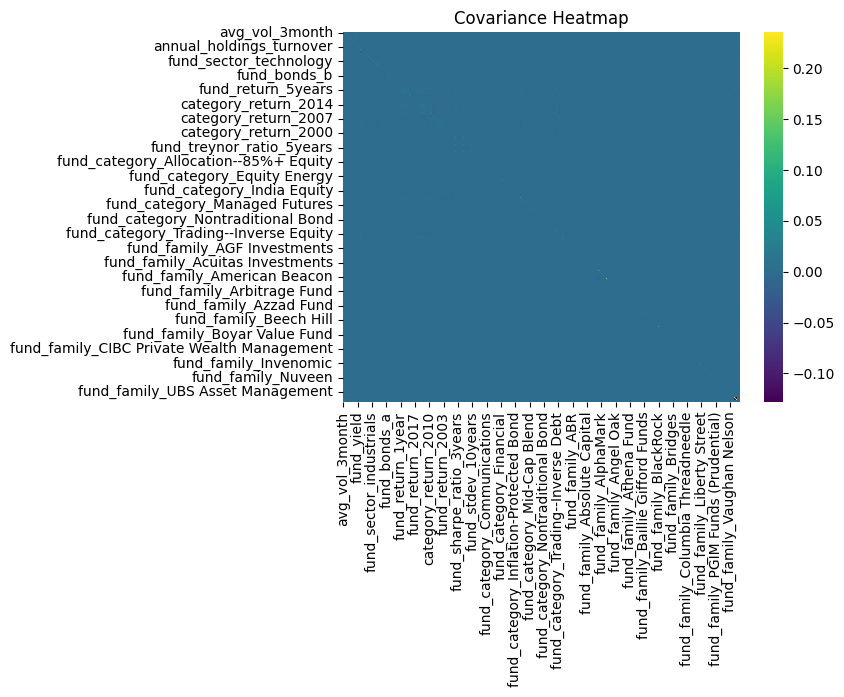

In [9]:
# Heatmap of covariance matrix
sns.heatmap(c, cmap='viridis')
plt.title('Covariance Heatmap')
plt.show()


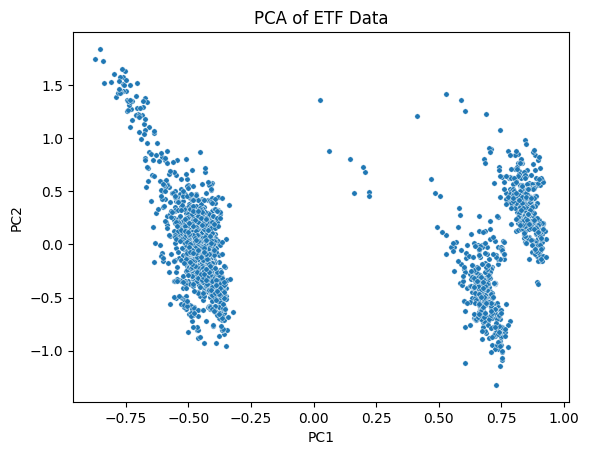

In [10]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2, svd_solver='full')
X = pca.fit_transform(df_scaled)
X = pd.DataFrame(X, columns=['PC1', 'PC2'])
sns.scatterplot(data=X, x='PC1', y='PC2', s=15)
plt.title('PCA of ETF Data')
plt.show()

### DBSCAN Clustering

In [11]:
# DBSCAN Clustering
model = DBSCAN(eps=0.3, min_samples=4)
model.fit(X)

DBSCAN(eps=0.3, min_samples=4)

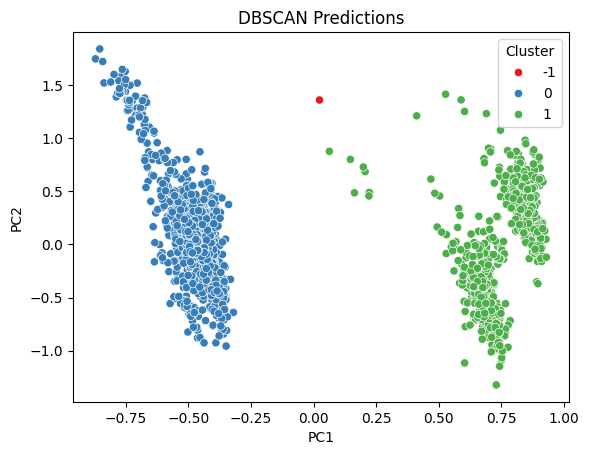

In [12]:

sns.scatterplot(data=X, x='PC1', y='PC2', hue=model.labels_, palette='Set1').set(title='DBSCAN Predictions')
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Additional visualizations


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

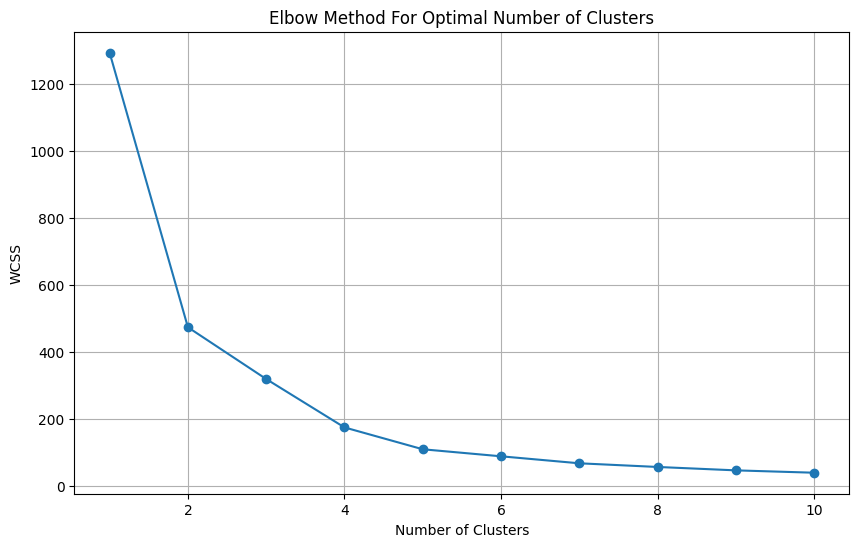

In [17]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


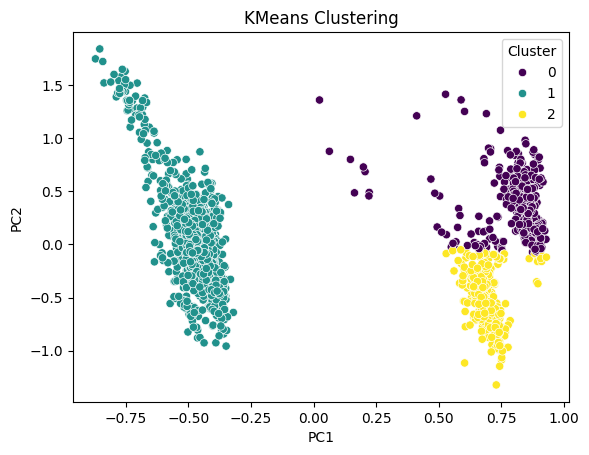

In [18]:
# Apply KMeans with the optimal number of clusters
optimal_clusters = 3  # This should be chosen based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=X, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering')
plt.legend(title='Cluster')
plt.show()